In [1]:
import numpy as np
import pandas as pd 
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

In [29]:
df = dd.read_parquet('../data/processed/flights.parquet', engine='pyarrow')

In [30]:
df.compute().shape

(5995397, 61)

In [31]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROU

In [43]:
def plot_na_by_col(df, **kwargs):
    na_by_col = df.isna().sum().compute() / len(df) 
    na_by_col.sort_values(ascending=False, inplace=True)
    fig, ax = plt.subplots()
    if kwargs['figsize']:
        fig.set_size_inches(kwargs['figsize'][0], kwargs['figsize'][1])
    ax = sns.barplot(
        x=na_by_col,
        y=na_by_col.index
    )
    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f')
    plt.ylabel('variable')
    plt.xlabel('% missing')
    plt.show()

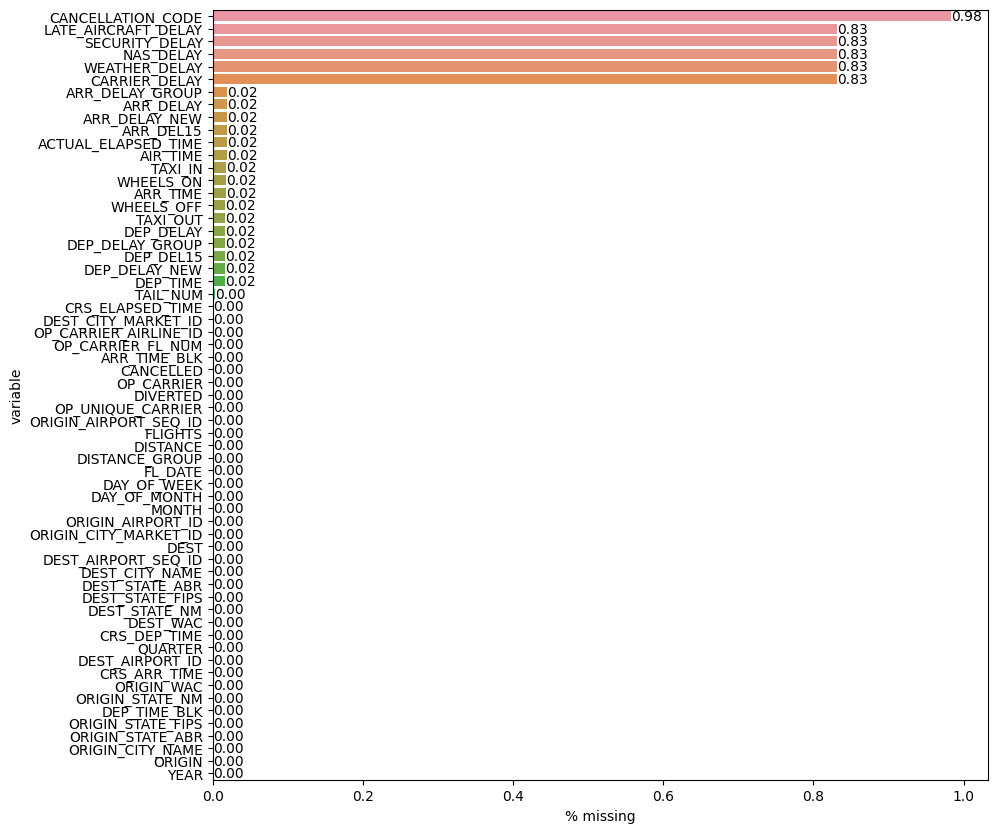

In [44]:
plot_na_by_col(df, figsize=(10, 10))